# Research Questions

## 1. How is rent price distribution in Land Brandenburg (Germany)?

## 2. Which city has the most expensive rent and the cheapest in Land Brandenburg (Germany)?

## 3. What are the factors (such as rooms, balcony, parking space) which can influence on rent price Brandenburg?

## 4. Comparing KNN and Linear regression models in order to predict rent prices in Brandeng.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!dir

 Volume in Laufwerk C: hat keine Bezeichnung.
 Volumeseriennummer: A60A-8416

 Verzeichnis von C:\Users\asgar\Ironhack\Week_5\Mid_bootcamp_project\Notebooks

09/02/2023  09:58    <DIR>          .
09/02/2023  09:51    <DIR>          ..
09/02/2023  09:58    <DIR>          .ipynb_checkpoints
08/02/2023  23:01           836,753 Analysis and Exploration of  Data.ipynb
08/02/2023  17:28            13,758 Analysis_Training Liniear Model.ipynb
09/02/2023  09:42            22,107 Analysis_Training Models.ipynb
08/02/2023  23:01           120,656 Data_Cleaning_Removing outliers.ipynb
               4 Datei(en),        993,274 Bytes
               3 Verzeichnis(se), 423,178,432,512 Bytes frei


In [3]:
df = pd.read_csv('../Data/immo_data.csv.zip')
df.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [5]:
df.isna().sum()

regio1                           0
serviceCharge                 6909
heatingType                  44856
telekomTvOffer               32619
telekomHybridUploadSpeed    223830
newlyConst                       0
balcony                          0
picturecount                     0
pricetrend                    1832
telekomUploadSpeed           33358
totalRent                    40517
yearConstructed              57045
scoutId                          0
noParkSpaces                175798
firingTypes                  56964
hasKitchen                       0
geo_bln                          0
cellar                           0
yearConstructedRange         57045
baseRent                         0
houseNumber                  71018
livingSpace                      0
geo_krs                          0
condition                    68489
interiorQual                112665
petsAllowed                 114573
street                           0
streetPlain                  71013
lift                

# Brandenburg

In [6]:
brandenburg_df = df[df["regio1"] == 'Brandenburg'] 
brandenburg_df.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'telekomHybridUploadSpeed', 'newlyConst', 'balcony', 'picturecount',
       'pricetrend', 'telekomUploadSpeed', 'totalRent', 'yearConstructed',
       'scoutId', 'noParkSpaces', 'firingTypes', 'hasKitchen', 'geo_bln',
       'cellar', 'yearConstructedRange', 'baseRent', 'houseNumber',
       'livingSpace', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat',
       'geo_plz', 'noRooms', 'thermalChar', 'floor', 'numberOfFloors',
       'noRoomsRange', 'garden', 'livingSpaceRange', 'regio2', 'regio3',
       'description', 'facilities', 'heatingCosts', 'energyEfficiencyClass',
       'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice', 'date'],
      dtype='object')

In [7]:
needed_cols=['regio1','regio2', 
'balcony', 'livingSpace', 'totalRent', 'serviceCharge',
'baseRent','lift',
'petsAllowed','floor','noRooms','garden','cellar','noParkSpaces']

In [8]:
brandenburg_df = brandenburg_df.loc[:,['regio1','regio2', 
'balcony', 'livingSpace', 'totalRent', 'serviceCharge',
'baseRent','lift','petsAllowed','floor','noRooms','garden','cellar','noParkSpaces']]
brandenburg_df.head()

,regio1,regio2,balcony,livingSpace,totalRent,serviceCharge,baseRent,lift,petsAllowed,floor,noRooms,garden,cellar,noParkSpaces
50,Brandenburg,Oder_Spree_Kreis,True,36.29,377.0,50.0,285.0,True,negotiable,1.0,1.0,False,True,NaN
114,Brandenburg,Märkisch_Oderland_Kreis,True,60.71,435.0,65.0,300.0,False,NaN,0.0,2.0,False,True,NaN
136,Brandenburg,Brandenburg_an_der_Havel,True,67.80,590.0,170.0,420.0,True,yes,0.0,3.0,False,True,NaN
232,Brandenburg,Potsdam,True,88.00,1300.0,300.0,1000.0,True,negotiable,2.0,3.0,True,True,1.0
331,Brandenburg,Dahme_Spreewald_Kreis,True,69.00,533.0,150.0,370.0,False,negotiable,2.0,2.0,True,True,1.0


## Renaming the columns properly in brandenburg_df

In [9]:
dict = {'regio1': 'land','regio2': 'city','livingSpace': 'living_space','totalRent': 'total_rent',
       'serviceCharge': 'service_charge','baseRent': 'base_rent','typeOfFlat': 'type_of_flat','petsAllowed': 'pets_allowed',
       'noRooms': 'no_rooms','yearConstructed': 'year_constructed',}
brandenburg_df.rename(columns=dict,
          inplace=True)
brandenburg_df

,land,city,balcony,living_space,total_rent,service_charge,base_rent,lift,pets_allowed,floor,no_rooms,garden,cellar,noParkSpaces
50,Brandenburg,Oder_Spree_Kreis,True,36.29,377.00,50.00,285.00,True,negotiable,1.0,1.0,False,True,NaN
114,Brandenburg,Märkisch_Oderland_Kreis,True,60.71,435.00,65.00,300.00,False,NaN,0.0,2.0,False,True,NaN
136,Brandenburg,Brandenburg_an_der_Havel,True,67.80,590.00,170.00,420.00,True,yes,0.0,3.0,False,True,NaN
232,Brandenburg,Potsdam,True,88.00,1300.00,300.00,1000.00,True,negotiable,2.0,3.0,True,True,1.0
331,Brandenburg,Dahme_Spreewald_Kreis,True,69.00,533.00,150.00,370.00,False,negotiable,2.0,2.0,True,True,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268659,Brandenburg,Elbe_Elster_Kreis,True,32.86,276.76,53.97,183.36,False,negotiable,1.0,1.0,False,False,NaN
268715,Brandenburg,Brandenburg_an_der_Havel,True,50.03,675.00,60.00,525.00,False,negotiable,NaN,2.0,False,True,NaN
268799,Brandenburg,Oberspreewald_Lausitz_Kreis,True,105.00,750.00,105.00,525.00,False,negotiable,1.0,2.0,False,True,NaN
268802,Brandenburg,Ostprignitz_Ruppin_Kreis,True,73.00,710.00,215.00,495.00,False,negotiable,1.0,2.0,True,True,NaN


## Dealind with Dublicted values

In [10]:
brandenburg_df.duplicated().sum()

232

In [11]:
brandenburg_df=brandenburg_df.drop_duplicates()

In [12]:
brandenburg_df.duplicated().sum()

0

## Dealing with missing values

In [13]:
brandenburg_df.shape

(6722, 14)

In [14]:
brandenburg_df.isna().sum()

land                 0
city                 0
balcony              0
living_space         0
total_rent         523
service_charge     116
base_rent            0
lift                 0
pets_allowed      2862
floor              860
no_rooms             0
garden               0
cellar               0
noParkSpaces      4556
dtype: int64

In [15]:
brandenburg_df

,land,city,balcony,living_space,total_rent,service_charge,base_rent,lift,pets_allowed,floor,no_rooms,garden,cellar,noParkSpaces
50,Brandenburg,Oder_Spree_Kreis,True,36.29,377.00,50.00,285.00,True,negotiable,1.0,1.0,False,True,NaN
114,Brandenburg,Märkisch_Oderland_Kreis,True,60.71,435.00,65.00,300.00,False,NaN,0.0,2.0,False,True,NaN
136,Brandenburg,Brandenburg_an_der_Havel,True,67.80,590.00,170.00,420.00,True,yes,0.0,3.0,False,True,NaN
232,Brandenburg,Potsdam,True,88.00,1300.00,300.00,1000.00,True,negotiable,2.0,3.0,True,True,1.0
331,Brandenburg,Dahme_Spreewald_Kreis,True,69.00,533.00,150.00,370.00,False,negotiable,2.0,2.0,True,True,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268659,Brandenburg,Elbe_Elster_Kreis,True,32.86,276.76,53.97,183.36,False,negotiable,1.0,1.0,False,False,NaN
268715,Brandenburg,Brandenburg_an_der_Havel,True,50.03,675.00,60.00,525.00,False,negotiable,NaN,2.0,False,True,NaN
268799,Brandenburg,Oberspreewald_Lausitz_Kreis,True,105.00,750.00,105.00,525.00,False,negotiable,1.0,2.0,False,True,NaN
268802,Brandenburg,Ostprignitz_Ruppin_Kreis,True,73.00,710.00,215.00,495.00,False,negotiable,1.0,2.0,True,True,NaN


In [16]:
# simple calculation, it is obsvious -- service + base = total_rent
brandenburg_df['total_rent'] = brandenburg_df['service_charge'] + brandenburg_df['base_rent']

C:\Users\asgar\AppData\Local\Temp\ipykernel_1652\999580858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brandenburg_df['total_rent'] = brandenburg_df['service_charge'] + brandenburg_df['base_rent']


In [17]:
print(brandenburg_df.isna().sum())
brandenburg_df.shape

land                 0
city                 0
balcony              0
living_space         0
total_rent         116
service_charge     116
base_rent            0
lift                 0
pets_allowed      2862
floor              860
no_rooms             0
garden               0
cellar               0
noParkSpaces      4556
dtype: int64


(6722, 14)

In [18]:
brandenburg_df=brandenburg_df.dropna(subset=['service_charge']) # dropping Nan rows from servicecharge

In [19]:
print(brandenburg_df.isna().sum())
brandenburg_df.shape

land                 0
city                 0
balcony              0
living_space         0
total_rent           0
service_charge       0
base_rent            0
lift                 0
pets_allowed      2791
floor              792
no_rooms             0
garden               0
cellar               0
noParkSpaces      4473
dtype: int64


(6606, 14)

In [20]:
brandenburg_df.pets_allowed.value_counts() # checking values in the column

negotiable    2774
no             654
yes            387
Name: pets_allowed, dtype: int64

In [21]:
brandenburg_df['pets_allowed']=brandenburg_df['pets_allowed'].fillna('no') 
# I assume the value is "no" if there is not data for pet_allowed

C:\Users\asgar\AppData\Local\Temp\ipykernel_1652\39028658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brandenburg_df['pets_allowed']=brandenburg_df['pets_allowed'].fillna('no')


In [22]:
print(brandenburg_df.isna().sum())
brandenburg_df.shape

land                 0
city                 0
balcony              0
living_space         0
total_rent           0
service_charge       0
base_rent            0
lift                 0
pets_allowed         0
floor              792
no_rooms             0
garden               0
cellar               0
noParkSpaces      4473
dtype: int64


(6606, 14)

In [23]:
brandenburg_df=brandenburg_df.dropna(subset=['floor']) 
# dropping NaN rows from floor as we can not calculate/assume floors

In [24]:
brandenburg_df['noParkSpaces']=brandenburg_df['noParkSpaces'].fillna('0') 
# I assume the value is "no" if there is not data for parkSpaces

In [25]:
print(brandenburg_df.isna().sum())
brandenburg_df.shape

land              0
city              0
balcony           0
living_space      0
total_rent        0
service_charge    0
base_rent         0
lift              0
pets_allowed      0
floor             0
no_rooms          0
garden            0
cellar            0
noParkSpaces      0
dtype: int64


(5814, 14)

In [26]:
brandenburg_df.describe().T

,count,mean,std,min,25%,50%,75%,max
living_space,5814.0,70.200967,116.202376,0.00,54.1475,62.41,78.060,8684.0
total_rent,5814.0,633.807699,390.317492,7.55,403.9250,511.27,756.460,8430.0
service_charge,5814.0,132.630095,76.626433,0.00,78.5925,120.00,166.915,1580.0
base_rent,5814.0,501.177604,335.605243,5.90,301.1200,390.00,610.000,6850.0
floor,5814.0,2.139319,2.012995,-1.00,1.0000,2.00,3.000,99.0
no_rooms,5814.0,2.589233,1.093795,1.00,2.0000,3.00,3.000,50.0


In [27]:
brandenburg_df

,land,city,balcony,living_space,total_rent,service_charge,base_rent,lift,pets_allowed,floor,no_rooms,garden,cellar,noParkSpaces
50,Brandenburg,Oder_Spree_Kreis,True,36.29,335.00,50.00,285.00,True,negotiable,1.0,1.0,False,True,0
114,Brandenburg,Märkisch_Oderland_Kreis,True,60.71,365.00,65.00,300.00,False,no,0.0,2.0,False,True,0
136,Brandenburg,Brandenburg_an_der_Havel,True,67.80,590.00,170.00,420.00,True,yes,0.0,3.0,False,True,0
232,Brandenburg,Potsdam,True,88.00,1300.00,300.00,1000.00,True,negotiable,2.0,3.0,True,True,1.0
331,Brandenburg,Dahme_Spreewald_Kreis,True,69.00,520.00,150.00,370.00,False,negotiable,2.0,2.0,True,True,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268640,Brandenburg,Märkisch_Oderland_Kreis,True,58.78,385.00,50.00,335.00,False,no,0.0,2.0,False,True,0
268659,Brandenburg,Elbe_Elster_Kreis,True,32.86,237.33,53.97,183.36,False,negotiable,1.0,1.0,False,False,0
268799,Brandenburg,Oberspreewald_Lausitz_Kreis,True,105.00,630.00,105.00,525.00,False,negotiable,1.0,2.0,False,True,0
268802,Brandenburg,Ostprignitz_Ruppin_Kreis,True,73.00,710.00,215.00,495.00,False,negotiable,1.0,2.0,True,True,0


In [28]:
import numpy as np
brandenburg_df.select_dtypes(include=np.number)

,living_space,total_rent,service_charge,base_rent,floor,no_rooms
50,36.29,335.00,50.00,285.00,1.0,1.0
114,60.71,365.00,65.00,300.00,0.0,2.0
136,67.80,590.00,170.00,420.00,0.0,3.0
232,88.00,1300.00,300.00,1000.00,2.0,3.0
331,69.00,520.00,150.00,370.00,2.0,2.0
...,...,...,...,...,...,...
268640,58.78,385.00,50.00,335.00,0.0,2.0
268659,32.86,237.33,53.97,183.36,1.0,1.0
268799,105.00,630.00,105.00,525.00,1.0,2.0
268802,73.00,710.00,215.00,495.00,1.0,2.0


In [29]:
brandenburg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5814 entries, 50 to 268810
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   land            5814 non-null   object 
 1   city            5814 non-null   object 
 2   balcony         5814 non-null   bool   
 3   living_space    5814 non-null   float64
 4   total_rent      5814 non-null   float64
 5   service_charge  5814 non-null   float64
 6   base_rent       5814 non-null   float64
 7   lift            5814 non-null   bool   
 8   pets_allowed    5814 non-null   object 
 9   floor           5814 non-null   float64
 10  no_rooms        5814 non-null   float64
 11  garden          5814 non-null   bool   
 12  cellar          5814 non-null   bool   
 13  noParkSpaces    5814 non-null   object 
dtypes: bool(4), float64(6), object(4)
memory usage: 522.4+ KB


In [30]:
brandenburg_df["noParkSpaces"] = pd.to_numeric(brandenburg_df["noParkSpaces"])
#converting 'noParkSpaces' to numerics

In [31]:
brandenburg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5814 entries, 50 to 268810
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   land            5814 non-null   object 
 1   city            5814 non-null   object 
 2   balcony         5814 non-null   bool   
 3   living_space    5814 non-null   float64
 4   total_rent      5814 non-null   float64
 5   service_charge  5814 non-null   float64
 6   base_rent       5814 non-null   float64
 7   lift            5814 non-null   bool   
 8   pets_allowed    5814 non-null   object 
 9   floor           5814 non-null   float64
 10  no_rooms        5814 non-null   float64
 11  garden          5814 non-null   bool   
 12  cellar          5814 non-null   bool   
 13  noParkSpaces    5814 non-null   float64
dtypes: bool(4), float64(7), object(3)
memory usage: 522.4+ KB


In [32]:
brandenburg_df=brandenburg_df.reset_index(drop=True) # restting the index

## 1. How is rent price distribution in Land Brandenburg (Germany)?

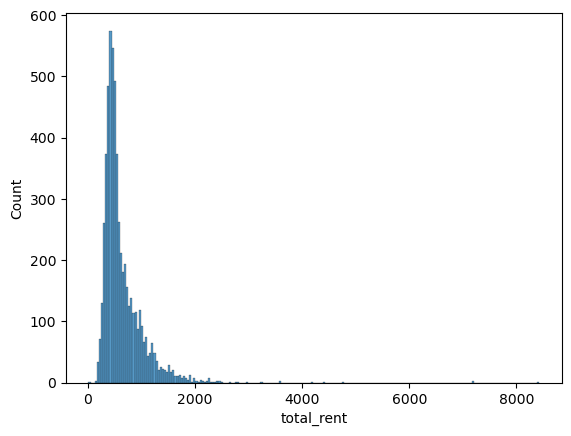

In [33]:
sns.histplot (x='total_rent', data=brandenburg_df)
plt.savefig("plot.png", dpi=300)
plt.show()

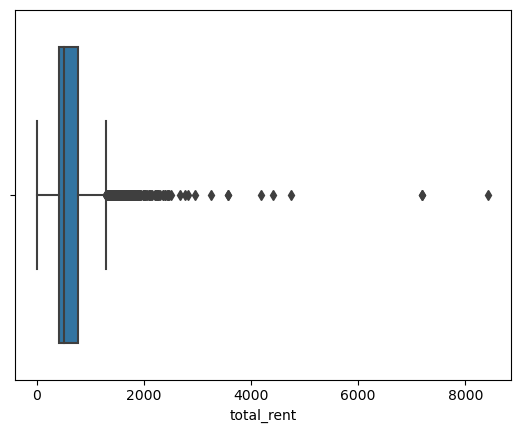

In [34]:
sns.boxplot (x='total_rent', data=brandenburg_df)
plt.savefig("plot.png", dpi=300)
plt.show()

We can see rent price distribution from above 2 graphs and it differs from around 200 to more 8000. However we see some outliers we will cut them in the next step in order to train our model

### Numerical Columns

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
import numpy as np
brandenburg_df.select_dtypes(include=np.number)

,living_space,total_rent,service_charge,base_rent,floor,no_rooms,noParkSpaces
0,36.29,335.00,50.00,285.00,1.0,1.0,0.0
1,60.71,365.00,65.00,300.00,0.0,2.0,0.0
2,67.80,590.00,170.00,420.00,0.0,3.0,0.0
3,88.00,1300.00,300.00,1000.00,2.0,3.0,1.0
4,69.00,520.00,150.00,370.00,2.0,2.0,1.0
...,...,...,...,...,...,...,...
5809,58.78,385.00,50.00,335.00,0.0,2.0,0.0
5810,32.86,237.33,53.97,183.36,1.0,1.0,0.0
5811,105.00,630.00,105.00,525.00,1.0,2.0,0.0
5812,73.00,710.00,215.00,495.00,1.0,2.0,0.0


Outliers in first view

Text(0.5, 1.0, 'noParkSpaces')

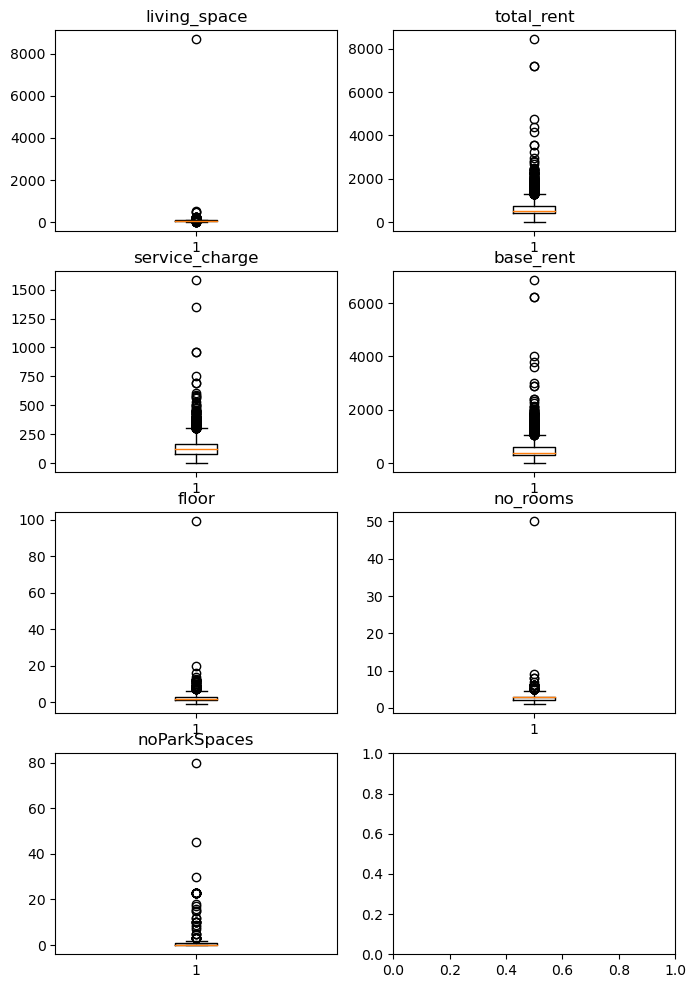

In [37]:
fig,ax=plt.subplots(4,2,figsize=(8,12))
ax[0,0].boxplot(x = 'living_space', data=brandenburg_df)
ax[0,0].set_title('living_space')
ax[0,1].boxplot(x = 'total_rent', data=brandenburg_df)
ax[0,1].set_title('total_rent')
ax[1,0].boxplot(x = 'service_charge', data=brandenburg_df)
ax[1,0].set_title('service_charge')
ax[1,1].boxplot(x = 'base_rent', data=brandenburg_df)
ax[1,1].set_title('base_rent')
ax[2,0].boxplot(x = 'floor', data=brandenburg_df)
ax[2,0].set_title('floor')
ax[2,1].boxplot(x = 'no_rooms', data=brandenburg_df)
ax[2,1].set_title('no_rooms')
ax[3,0].boxplot(x = 'noParkSpaces', data=brandenburg_df)
ax[3,0].set_title('noParkSpaces')

### Removing outliers

###### column 'living_space'

In [38]:
Q1 = brandenburg_df['living_space'].quantile(0.25)
Q3 = brandenburg_df['living_space'].quantile(0.75)
IQR=Q3 - Q1
print(IQR)

23.9125


In [39]:
brandenburg_df=brandenburg_df[~((brandenburg_df['living_space']<(Q1-1.5*IQR)) | (brandenburg_df['living_space']>(Q3+1.5*IQR)))]

<AxesSubplot: xlabel='living_space'>

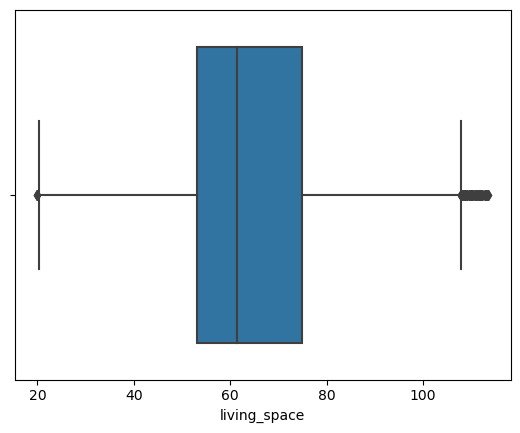

In [40]:
sns.boxplot (x='living_space', data=brandenburg_df)

In [41]:
brandenburg_df.shape

(5467, 14)

###### column 'Total Rent'

removing the outliers

In [42]:
Q1_t = brandenburg_df['total_rent'].quantile(0.25)
Q3_t = brandenburg_df['total_rent'].quantile(0.75)
IQR_t=Q3_t - Q1_t
print(IQR_t)

295.0


In [43]:
brandenburg_df=brandenburg_df[~((brandenburg_df['total_rent']<(Q1_t-1.5*IQR_t)) | (brandenburg_df['total_rent']>(Q3_t+1.5*IQR_t)))]

<AxesSubplot: xlabel='total_rent'>

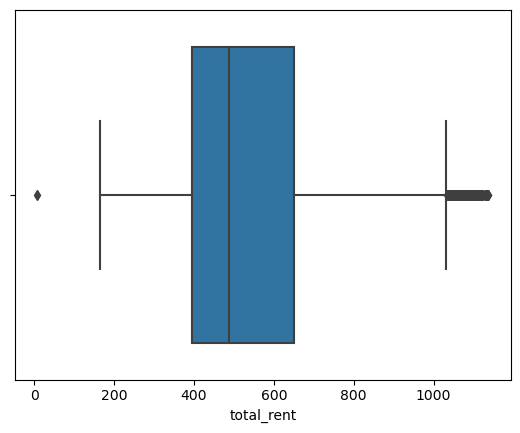

In [44]:
sns.boxplot (x='total_rent', data=brandenburg_df)

In [45]:
brandenburg_df.shape

(5177, 14)

I do not removie outliers from base_rent and service_charge as they are both dependent on total_rent.
Checking again outliers for above columns.

###### column 'floor'

<AxesSubplot: xlabel='floor'>

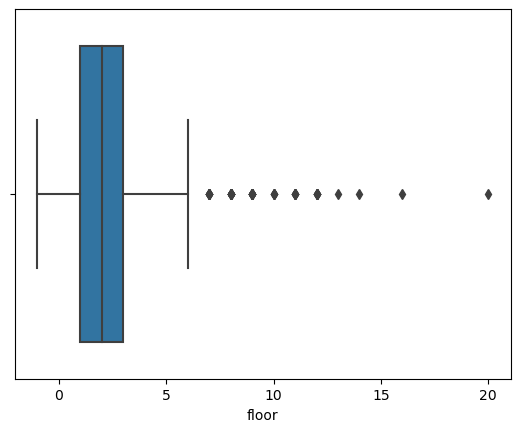

In [46]:
sns.boxplot (x='floor', data=brandenburg_df)

In [47]:
brandenburg_df.floor.value_counts()

 1.0     1402
 2.0     1314
 3.0      968
 4.0      614
 0.0      564
 5.0      218
 6.0       39
 8.0       13
 9.0       12
 7.0        8
 12.0       7
 11.0       6
 10.0       4
-1.0        4
 20.0       1
 13.0       1
 16.0       1
 14.0       1
Name: floor, dtype: int64

In [48]:
Q1_f = 0
Q3_f = 5

In [49]:
brandenburg_df=brandenburg_df[~((brandenburg_df['floor']<(Q1_f)) | (brandenburg_df['floor']>(Q3_f)))]

<AxesSubplot: xlabel='floor'>

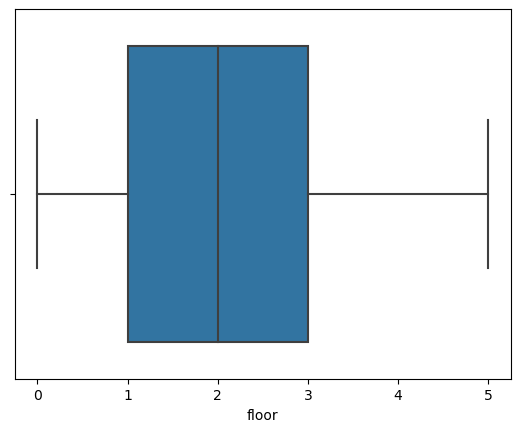

In [50]:
sns.boxplot (x='floor', data=brandenburg_df)

In [51]:
brandenburg_df.floor.value_counts()

1.0    1402
2.0    1314
3.0     968
4.0     614
0.0     564
5.0     218
Name: floor, dtype: int64

###### column 'no_rooms'

In [52]:
brandenburg_df.no_rooms.value_counts()

3.0     2050
2.0     1895
1.0      563
4.0      346
2.5       97
1.5       47
2.1       35
3.5       26
5.0       15
3.1        1
2.2        1
50.0       1
4.5        1
1.1        1
6.0        1
Name: no_rooms, dtype: int64

<AxesSubplot: xlabel='no_rooms'>

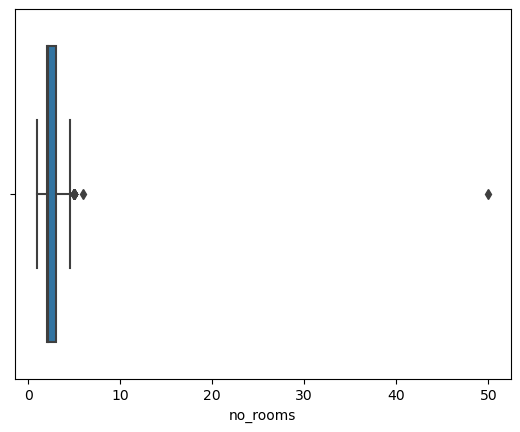

In [53]:
sns.boxplot (x='no_rooms', data=brandenburg_df)

In [54]:
Q1_r = -1
Q3_r = 5.5

In [55]:
brandenburg_df=brandenburg_df[~((brandenburg_df['no_rooms']<(Q1_r)) | (brandenburg_df['no_rooms']>(Q3_r)))]

<AxesSubplot: xlabel='no_rooms'>

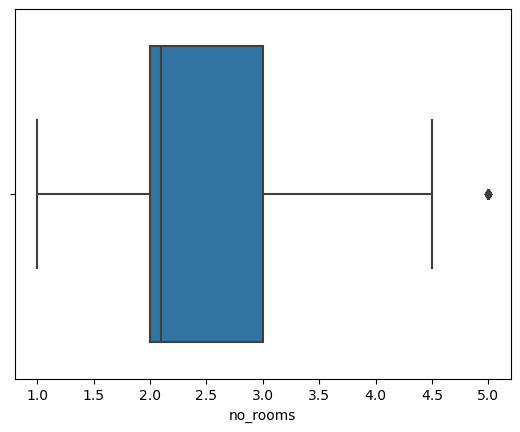

In [56]:
sns.boxplot (x='no_rooms', data=brandenburg_df)

In [57]:
brandenburg_df.no_rooms.value_counts()

3.0    2050
2.0    1895
1.0     563
4.0     346
2.5      97
1.5      47
2.1      35
3.5      26
5.0      15
3.1       1
2.2       1
4.5       1
1.1       1
Name: no_rooms, dtype: int64

In [58]:
brandenburg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5078 entries, 0 to 5813
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   land            5078 non-null   object 
 1   city            5078 non-null   object 
 2   balcony         5078 non-null   bool   
 3   living_space    5078 non-null   float64
 4   total_rent      5078 non-null   float64
 5   service_charge  5078 non-null   float64
 6   base_rent       5078 non-null   float64
 7   lift            5078 non-null   bool   
 8   pets_allowed    5078 non-null   object 
 9   floor           5078 non-null   float64
 10  no_rooms        5078 non-null   float64
 11  garden          5078 non-null   bool   
 12  cellar          5078 non-null   bool   
 13  noParkSpaces    5078 non-null   float64
dtypes: bool(4), float64(7), object(3)
memory usage: 456.2+ KB


In [59]:
brandenburg_df['no_rooms'] = brandenburg_df['no_rooms'].replace([2.5,2.1,2.2,1.5,3.5,3.1,2.2,4.5,1.1], 
                                                                [3,2,2,1,3,3,2,4,1])

In [60]:
brandenburg_df.no_rooms.value_counts()

3.0    2174
2.0    1931
1.0     611
4.0     347
5.0      15
Name: no_rooms, dtype: int64

###### column 'noParkSpaces'

In [61]:
brandenburg_df.noParkSpaces.value_counts()

0.0     3730
1.0     1235
2.0       72
23.0      19
3.0        4
10.0       4
15.0       2
5.0        2
12.0       2
16.0       1
80.0       1
18.0       1
9.0        1
17.0       1
7.0        1
30.0       1
45.0       1
Name: noParkSpaces, dtype: int64

In [62]:
Q1_s = 0
Q3_s = 2

In [63]:
brandenburg_df=brandenburg_df[~((brandenburg_df['noParkSpaces']<(Q1_s)) | (brandenburg_df['noParkSpaces']>(Q3_s)))]

In [64]:
# removed outliers
brandenburg_df.noParkSpaces.value_counts()

0.0    3730
1.0    1235
2.0      72
Name: noParkSpaces, dtype: int64

#### after all those processes , I check again all numerical columns

Text(0.5, 1.0, 'noParkSpaces')

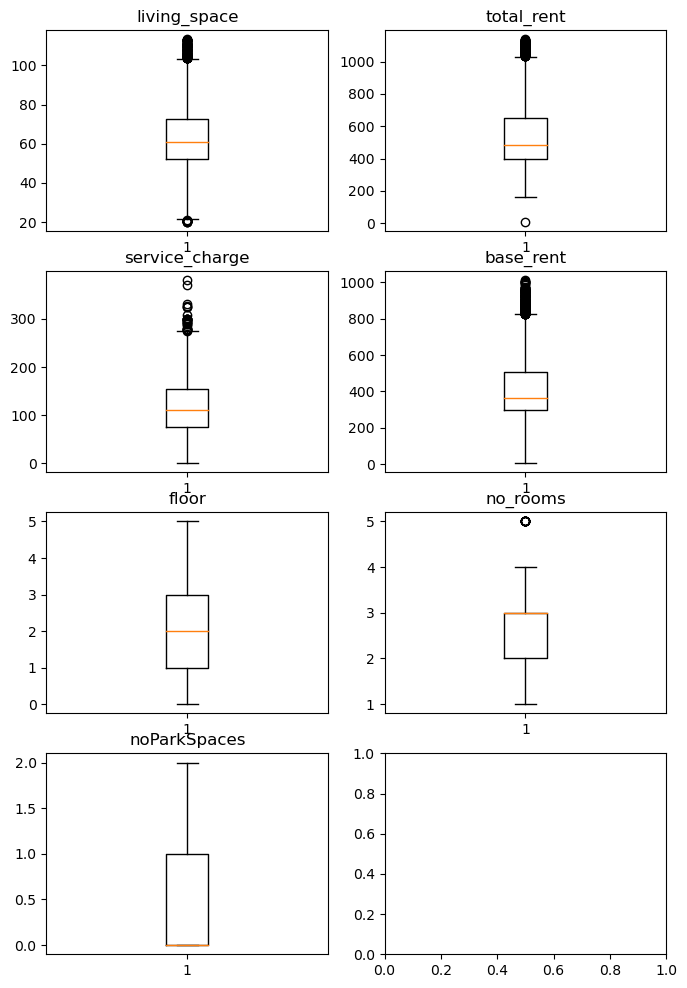

In [65]:
fig,ax=plt.subplots(4,2,figsize=(8,12))
ax[0,0].boxplot(x = 'living_space', data=brandenburg_df)
ax[0,0].set_title('living_space')
ax[0,1].boxplot(x = 'total_rent', data=brandenburg_df)
ax[0,1].set_title('total_rent')
ax[1,0].boxplot(x = 'service_charge', data=brandenburg_df)
ax[1,0].set_title('service_charge')
ax[1,1].boxplot(x = 'base_rent', data=brandenburg_df)
ax[1,1].set_title('base_rent')
ax[2,0].boxplot(x = 'floor', data=brandenburg_df)
ax[2,0].set_title('floor')
ax[2,1].boxplot(x = 'no_rooms', data=brandenburg_df)
ax[2,1].set_title('no_rooms')
ax[3,0].boxplot(x = 'noParkSpaces', data=brandenburg_df)
ax[3,0].set_title('noParkSpaces')

### Categorical Columns

In [66]:
brandenburg_df.select_dtypes(exclude=np.number)

,land,city,balcony,lift,pets_allowed,garden,cellar
0,Brandenburg,Oder_Spree_Kreis,True,True,negotiable,False,True
1,Brandenburg,Märkisch_Oderland_Kreis,True,False,no,False,True
2,Brandenburg,Brandenburg_an_der_Havel,True,True,yes,False,True
4,Brandenburg,Dahme_Spreewald_Kreis,True,False,negotiable,True,True
5,Brandenburg,Uckermark_Kreis,True,False,negotiable,False,True
...,...,...,...,...,...,...,...
5809,Brandenburg,Märkisch_Oderland_Kreis,True,False,no,False,True
5810,Brandenburg,Elbe_Elster_Kreis,True,False,negotiable,False,False
5811,Brandenburg,Oberspreewald_Lausitz_Kreis,True,False,negotiable,False,True
5812,Brandenburg,Ostprignitz_Ruppin_Kreis,True,False,negotiable,True,True


In [67]:
brandenburg_df.select_dtypes(exclude=np.number).isna().sum() #checking missing values again

land            0
city            0
balcony         0
lift            0
pets_allowed    0
garden          0
cellar          0
dtype: int64

In [68]:
brandenburg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5037 entries, 0 to 5813
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   land            5037 non-null   object 
 1   city            5037 non-null   object 
 2   balcony         5037 non-null   bool   
 3   living_space    5037 non-null   float64
 4   total_rent      5037 non-null   float64
 5   service_charge  5037 non-null   float64
 6   base_rent       5037 non-null   float64
 7   lift            5037 non-null   bool   
 8   pets_allowed    5037 non-null   object 
 9   floor           5037 non-null   float64
 10  no_rooms        5037 non-null   float64
 11  garden          5037 non-null   bool   
 12  cellar          5037 non-null   bool   
 13  noParkSpaces    5037 non-null   float64
dtypes: bool(4), float64(7), object(3)
memory usage: 452.5+ KB


In [69]:
brandenburg_df_clean=brandenburg_df.copy()
brandenburg_df_clean

,land,city,balcony,living_space,total_rent,service_charge,base_rent,lift,pets_allowed,floor,no_rooms,garden,cellar,noParkSpaces
0,Brandenburg,Oder_Spree_Kreis,True,36.29,335.00,50.00,285.00,True,negotiable,1.0,1.0,False,True,0.0
1,Brandenburg,Märkisch_Oderland_Kreis,True,60.71,365.00,65.00,300.00,False,no,0.0,2.0,False,True,0.0
2,Brandenburg,Brandenburg_an_der_Havel,True,67.80,590.00,170.00,420.00,True,yes,0.0,3.0,False,True,0.0
4,Brandenburg,Dahme_Spreewald_Kreis,True,69.00,520.00,150.00,370.00,False,negotiable,2.0,2.0,True,True,1.0
5,Brandenburg,Uckermark_Kreis,True,57.38,378.71,71.73,306.98,False,negotiable,4.0,3.0,False,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5809,Brandenburg,Märkisch_Oderland_Kreis,True,58.78,385.00,50.00,335.00,False,no,0.0,2.0,False,True,0.0
5810,Brandenburg,Elbe_Elster_Kreis,True,32.86,237.33,53.97,183.36,False,negotiable,1.0,1.0,False,False,0.0
5811,Brandenburg,Oberspreewald_Lausitz_Kreis,True,105.00,630.00,105.00,525.00,False,negotiable,1.0,2.0,False,True,0.0
5812,Brandenburg,Ostprignitz_Ruppin_Kreis,True,73.00,710.00,215.00,495.00,False,negotiable,1.0,2.0,True,True,0.0


#### Everything looks good with categorical columns. Thus, Dataset has been cleaned and it is ready for further analysis.I am saving e the final dataframe

In [70]:
brandenburg_df_clean.to_csv('../Data/brandenburg_cleaned.csv',index=False)